In [2]:
import numpy as np 
import pandas as pd
from plotnine import *


Task 1
#1
x = income, y= life expectancy, bubble size represents population size, color = world region, the data is 2010

In [105]:
region_colors = {
'africa': '#04e2d7',   
'americas': '#41e30a', 
'asia': '#f54174',     
'europe': '#f1e72d'    
}

In [ ]:
#2
q1= pd.read_csv("/Users/alexandra/Desktop/GSB_544/Week 1/Lab1/Data_Lab1/q1data (1).csv")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/scales/scale.py:130: PlotnineWarning: scale_x_log10 could not recognise parameter `lables`


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 11 rows containing missing values.


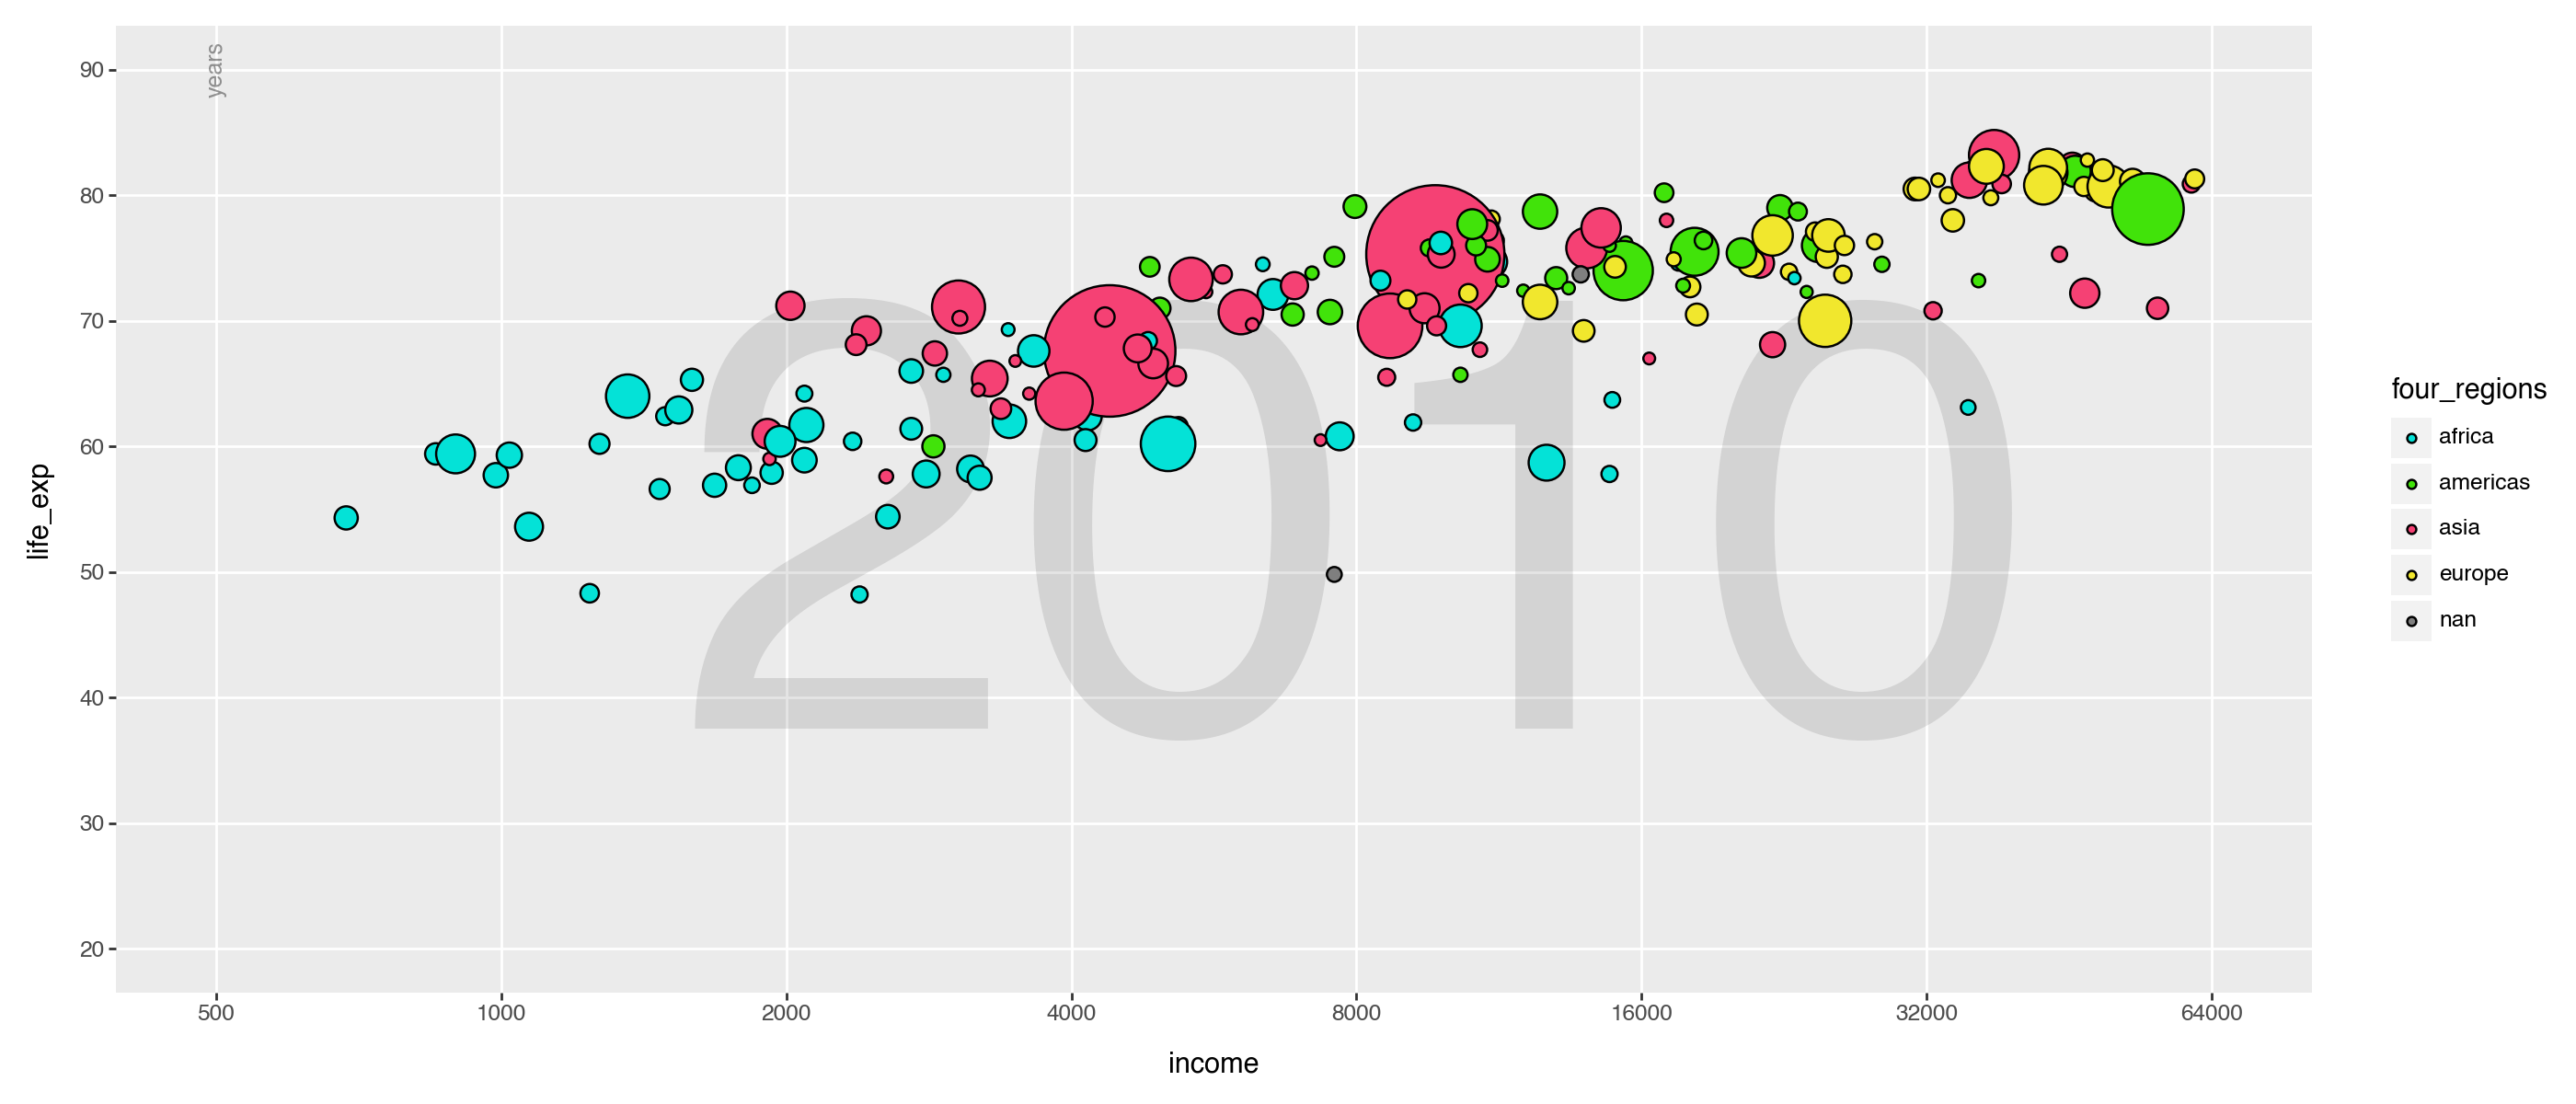

In [108]:

#3
(ggplot(q1, 
aes(x = "income",
  y = "life_exp",
  size = "population",
  fill= "four_regions"
  ))
+annotate("text", x=6000, y =50, label="2010", size=240, color = "black", alpha=0.1)
+annotate("text", x=500, y=90, label="years", size = 9, color= "black", alpha = .4, angle=90)
+guides(size=False)
+ geom_point()
+ theme (figure_size = (14,6), panel_grid_minor = element_blank())
+scale_fill_manual(values=region_colors)
+scale_x_log10(breaks=[ 500,1000,2000,4000,8000,16000,32000,64000], limits = (500,64000),
lables= ['1000','2000',"4000",'8000', '16k', '32k', '64k']
) 
+scale_y_continuous(breaks=[20,30,40,50,60,70,80,90], limits = (20,90))
+scale_size(range=(2,30))
)

#4 Making a density plot

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_density : Removed 2 rows containing non-finite values.


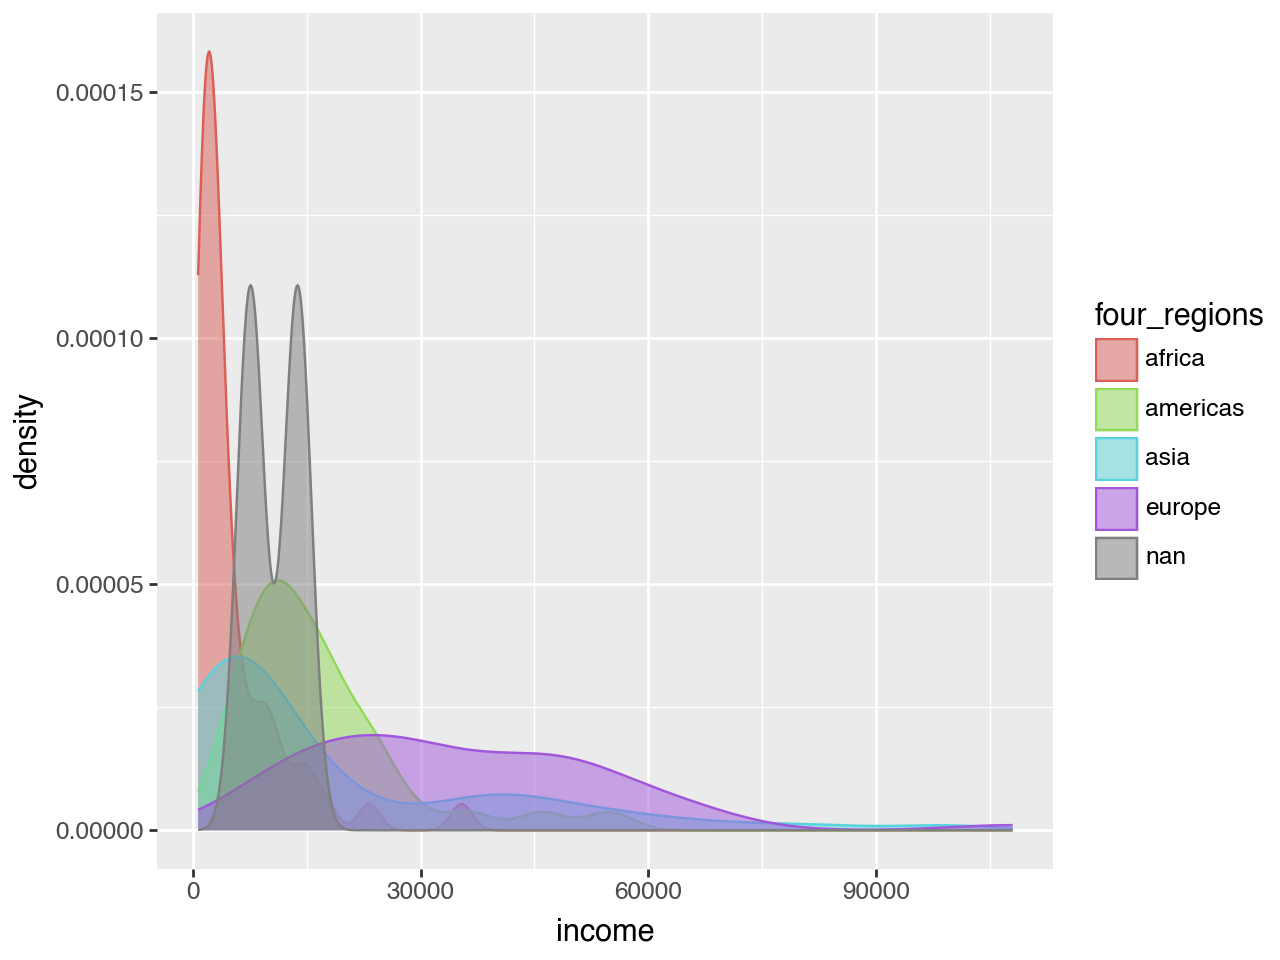

In [63]:
(ggplot(q1, 
aes(x = "income", 
    size = "population", 
    color = "four_regions",
    fill="four_regions"
  
))
+ geom_density(alpha=0.5)

)

#I created a density plot. It is not representative for the y variable, life expectancy. The graph is hard to read. 


A density plot is not a good representation of the catergical variables. It is hard to visualize especially compared to a scatter plot. 

Task 2
#1
x= exports of gdp , y= imports of gdp, bubble size = energy use, color = world regions, data = 1997

In [14]:
#2
q2= pd.read_csv("/Users/alexandra/Desktop/GSB_544/Week 1/Lab1/Data_Lab1/q2data.csv")

In [15]:
region_colors = {
'africa': '#04e2d7',   
'americas': '#41e30a', 
'asia': '#f54174',     
'europe': '#f1e72d'    
}


In [16]:
q2.head
#remove the k thousands numbers
q2['energy']= q2['energy'].str.replace('k','').astype(float) *1000
q2['energy']= q2['energy'].astype(float)

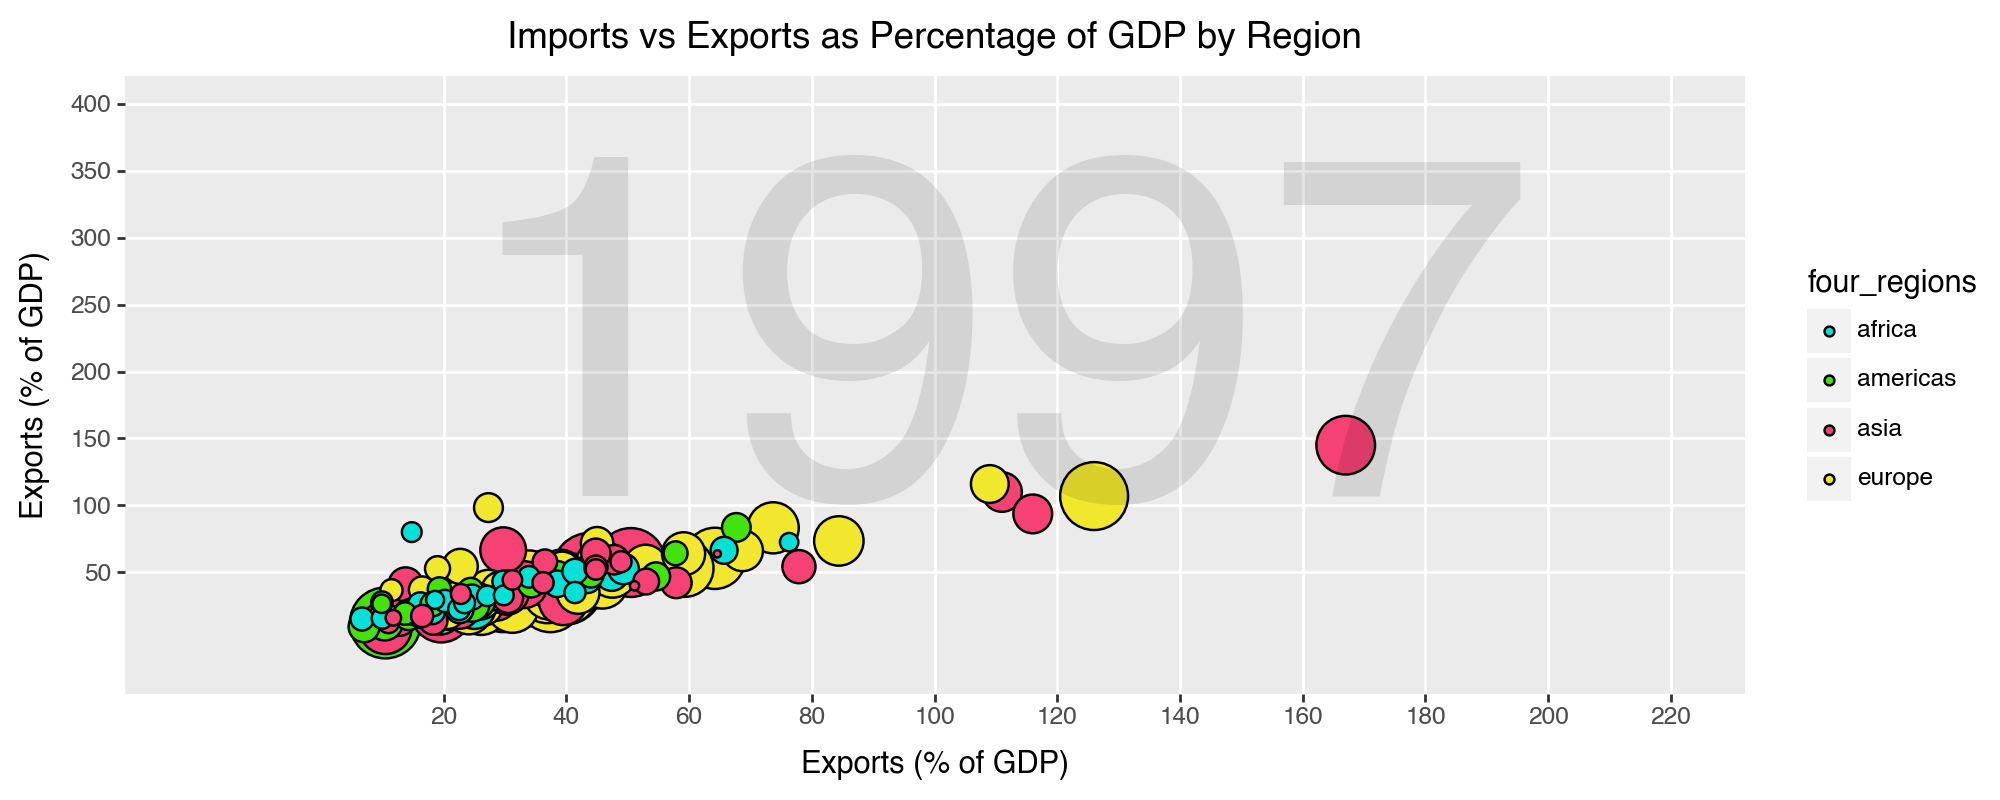

In [18]:
#3
q2 = q2.sort_values(by='energy', ascending=False)

q2= q2.dropna()
(ggplot(q2, 
aes(x = "exports",
  y = "imports",
  size = "energy",
  fill= "four_regions"
  ))
+ geom_point(alpha=1)
+ theme(figure_size = (10,4), panel_grid_minor = element_blank())
+scale_fill_manual(values=region_colors)
+annotate("text", x=110, y =200, label="1997", size=175, color = "black", alpha=0.1)
+ xlab("Exports (% of GDP)")
+ ylab("Exports (% of GDP)")
+guides(size=False)
+scale_x_continuous(breaks=[20,40,60,80,100,120,140,160, 180, 200,220], limits = (-20,220)
)
+scale_y_continuous(breaks=[50,100,150,200,250,300,350,400], limits = (-20,400))
+scale_size(range=(1,15))
+labs(title = 'Imports vs Exports as Percentage of GDP by Region', size='Energy Use', color='Region')
)


Creating a new

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 2 rows containing missing values.


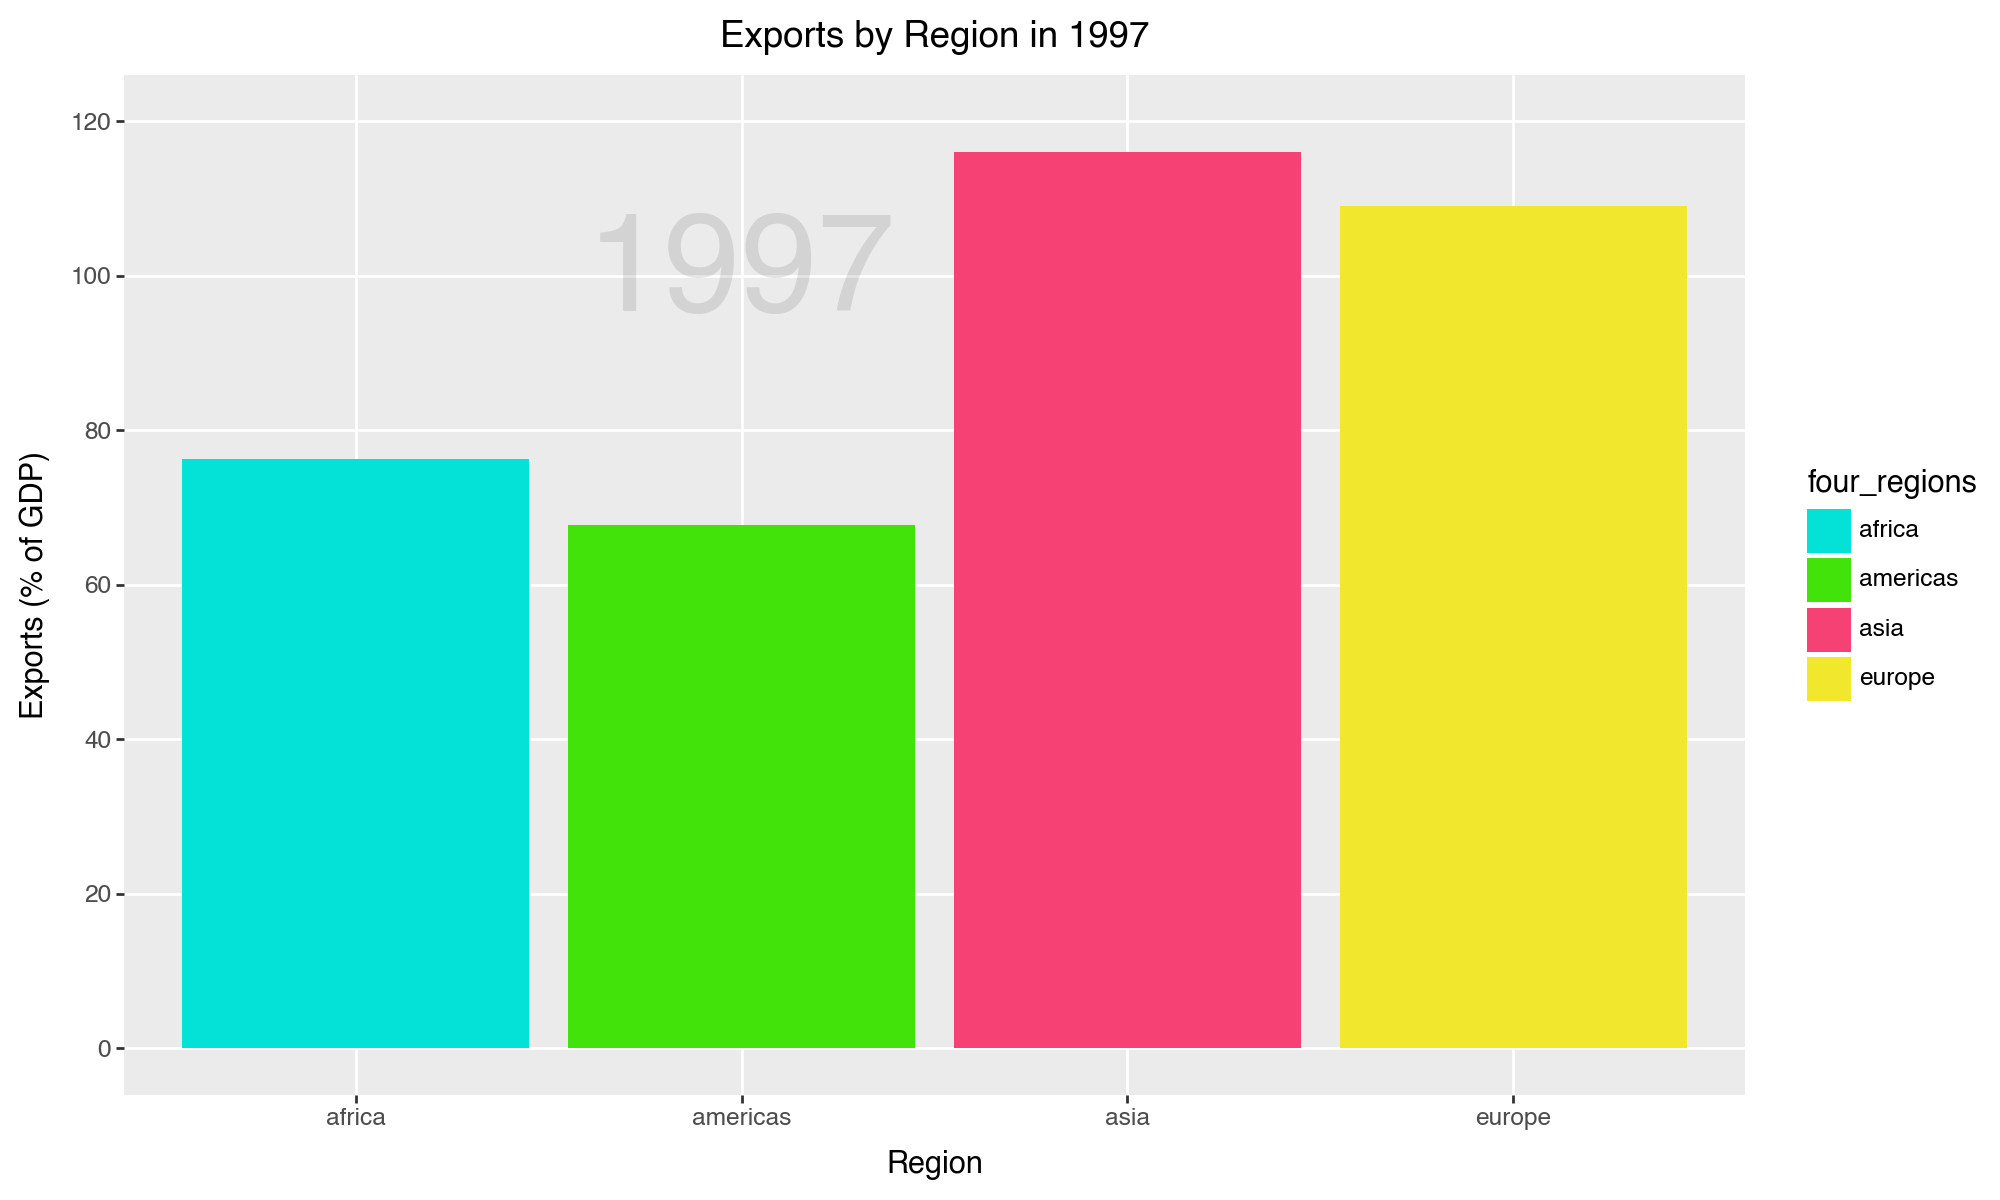

In [172]:

#4

q2 = q2.dropna()

(ggplot(q2, 
aes(x="four_regions", 
    y="exports", 
    fill="four_regions"))
 + geom_bar(stat="identity", position="dodge") 
 + theme(figure_size=(10, 6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=region_colors) 
 + xlab("Region")
 + ylab("Exports (% of GDP)")
 + annotate("text", x=2, y=100, label="1997", size=50, color="black", alpha=0.1)
 + scale_y_continuous(breaks=[0, 20, 40, 60, 80, 100, 120], limits=(0, 120))
 + labs(title='Exports by Region in 1997')
)

It is easy to visulaize by region which has the highest export % of GDP. However it completely leaves out Import % of GDP. 

Task 3
1. x= Individual internet users , y= gdp/capita, bubble size = income, color = world regions, data = 2001

In [8]:
#2
q3= pd.read_csv("/Users/alexandra/Desktop/GSB_544/Week 1/Lab1/Data_Lab1/q3data.csv")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_text : Removed 1 rows containing missing values.


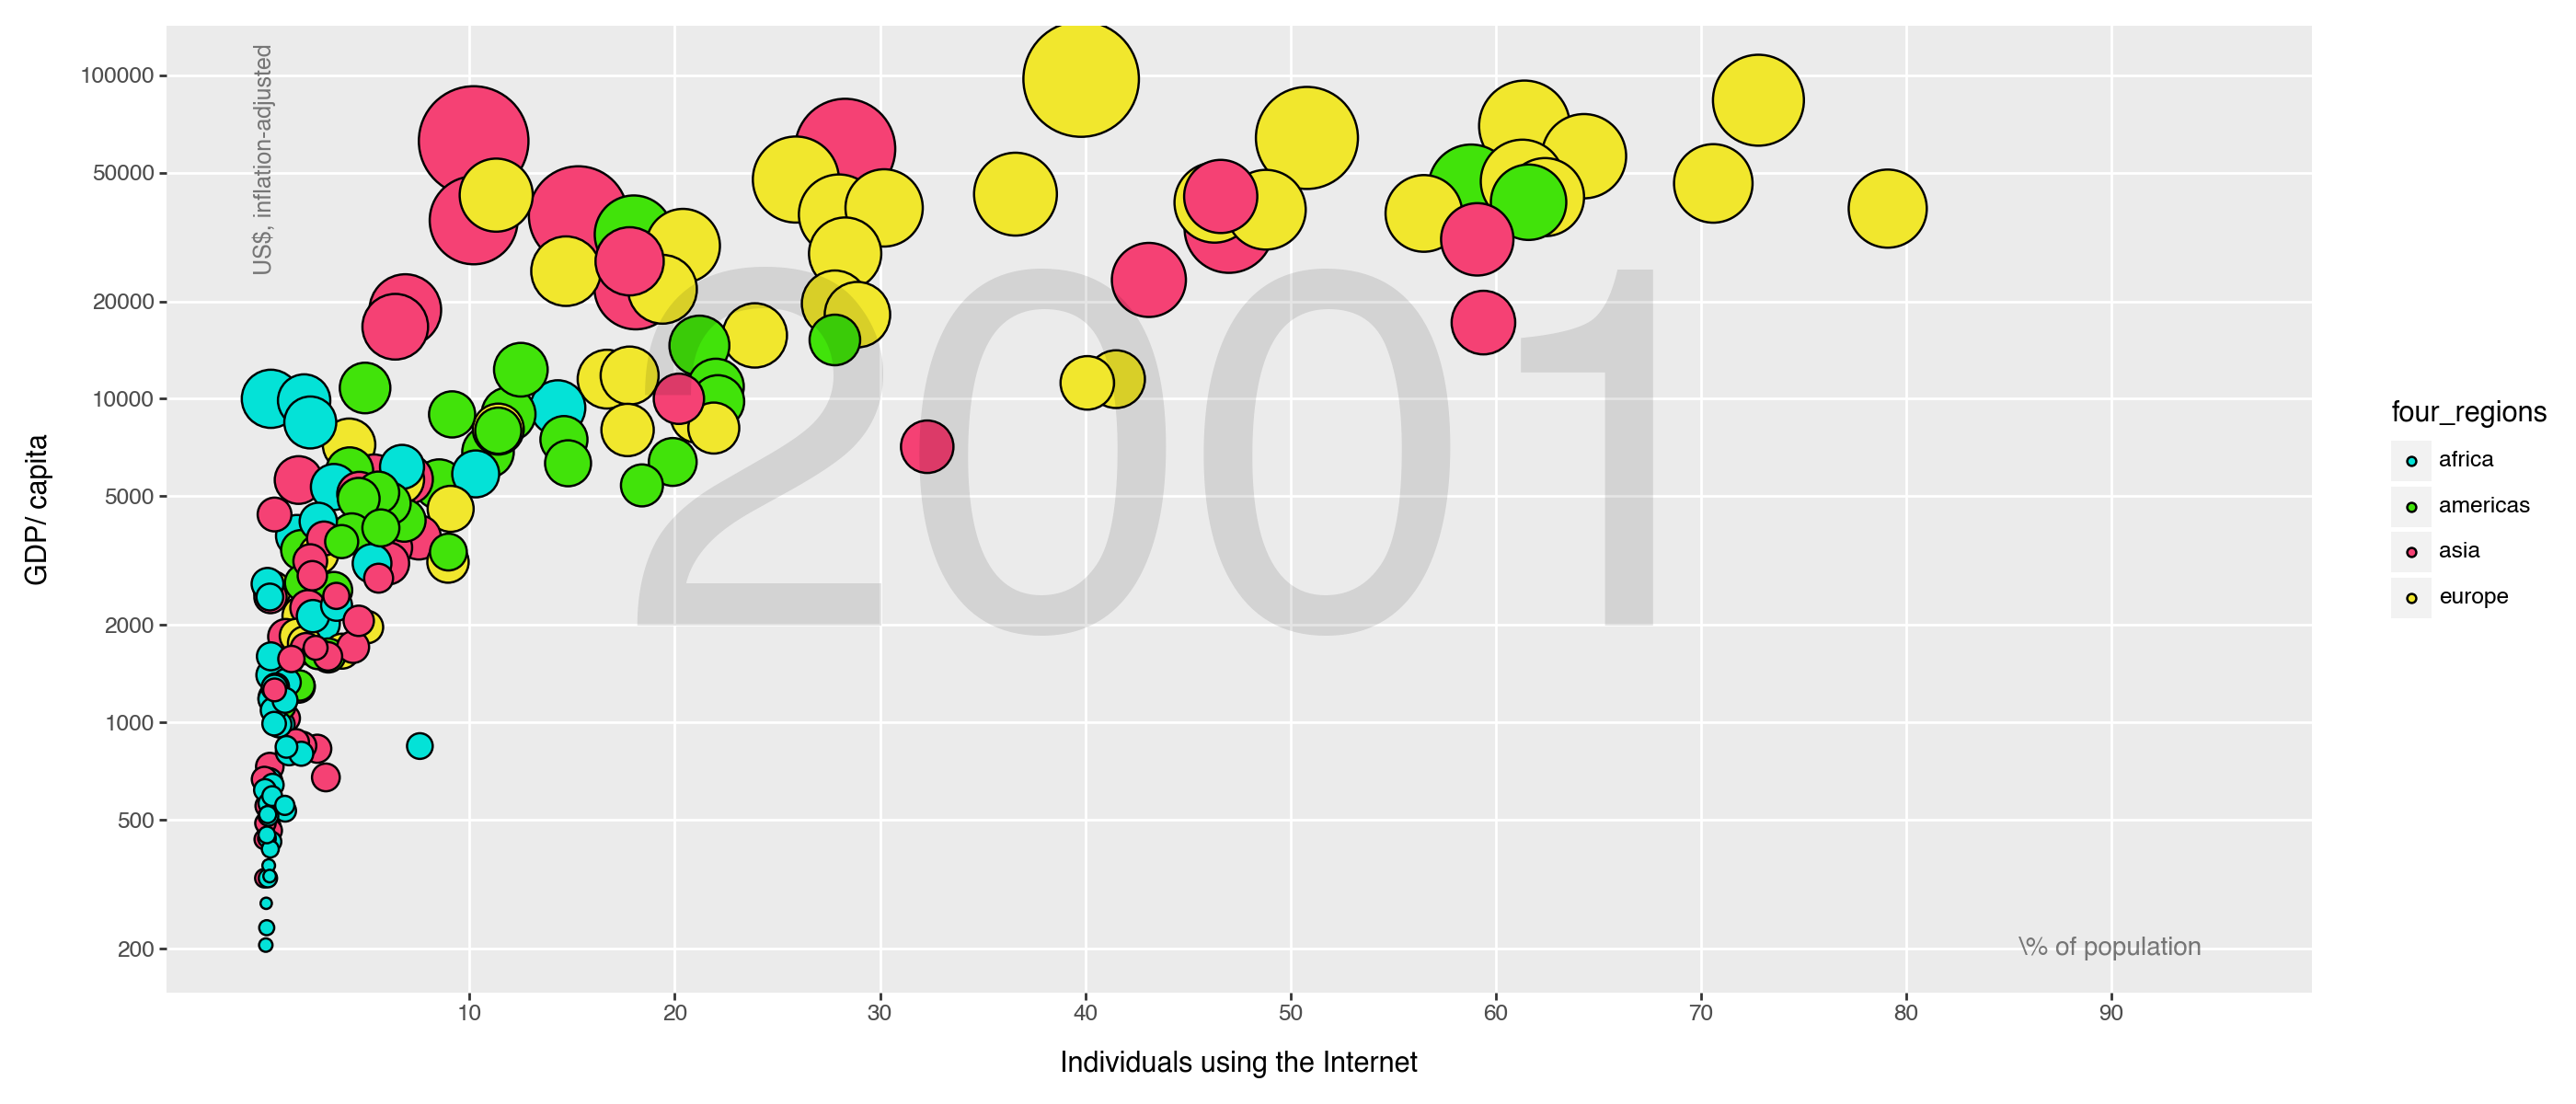

In [25]:
q3 = q3.sort_values(by='income', ascending=False)
q3= q3.dropna()
(ggplot(q3,

       aes(
         x='internet_users',
         y='gdp',
         size='income',
         fill='four_regions'
        
       ))
 + geom_point()
 + scale_size(range=(2, 25))
+ guides(size='none')
 #labels in corners
 + labs(x="Individuals using the Internet", y="GDP/ capita")
 + guides(size='none')
 + annotate("text", x=120, y=200, label="2001", size=200, color="black", alpha=.1)
 + theme(figure_size=(14,6), panel_grid_minor=element_blank())
 + scale_fill_manual(values=region_colors)
 + scale_x_continuous(breaks=[10,20,30,40,50,60,70,80,90], limits=(0, 95))
 + scale_y_log10(breaks=[200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000], limits=(200, 104000))
  + annotate("text", x=90, y=200, label="\% of population", size=10, color="black", alpha=.5)
  + annotate("text", x=0, y=55000, label="US$, inflation-adjusted", size=9, color="black", angle=90, alpha=.5)
  + annotate("text", x=45, y=5000, label="2001", size=200, color="black", alpha=.1)
 )

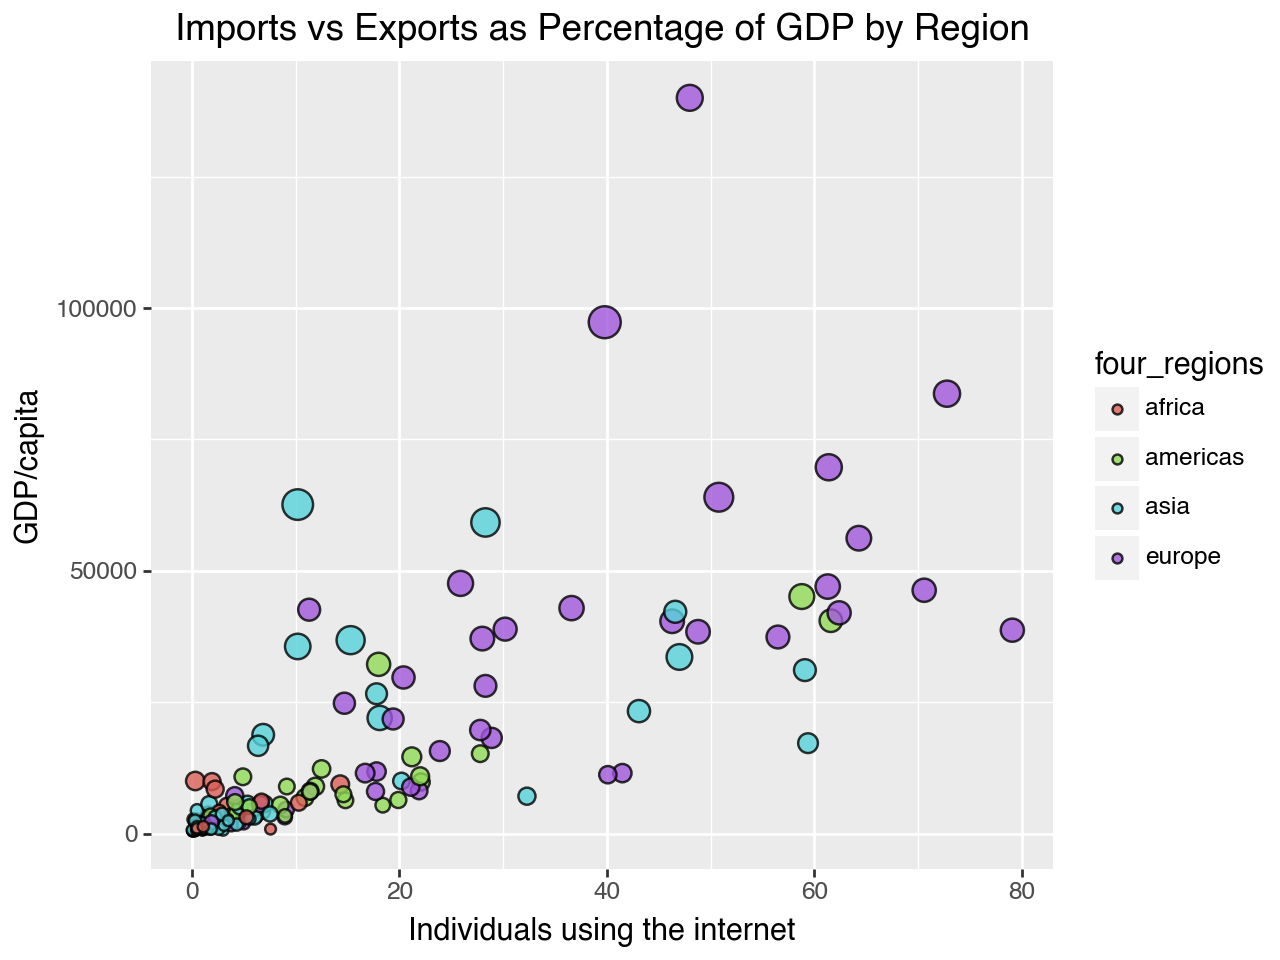

In [7]:
q3= q3.dropna()

(ggplot(q3, 
aes(x = "internet_users",
  y = "gdp",
  size = "income",
  fill= "four_regions"
  ))
+ geom_point(alpha=.8)
+ ylab("GDP/capita")
+ xlab("Individuals using the internet")
+guides(size=False)
+labs(title = 'Imports vs Exports as Percentage of GDP by Region',
size='income', 
color='Region'))



# testing

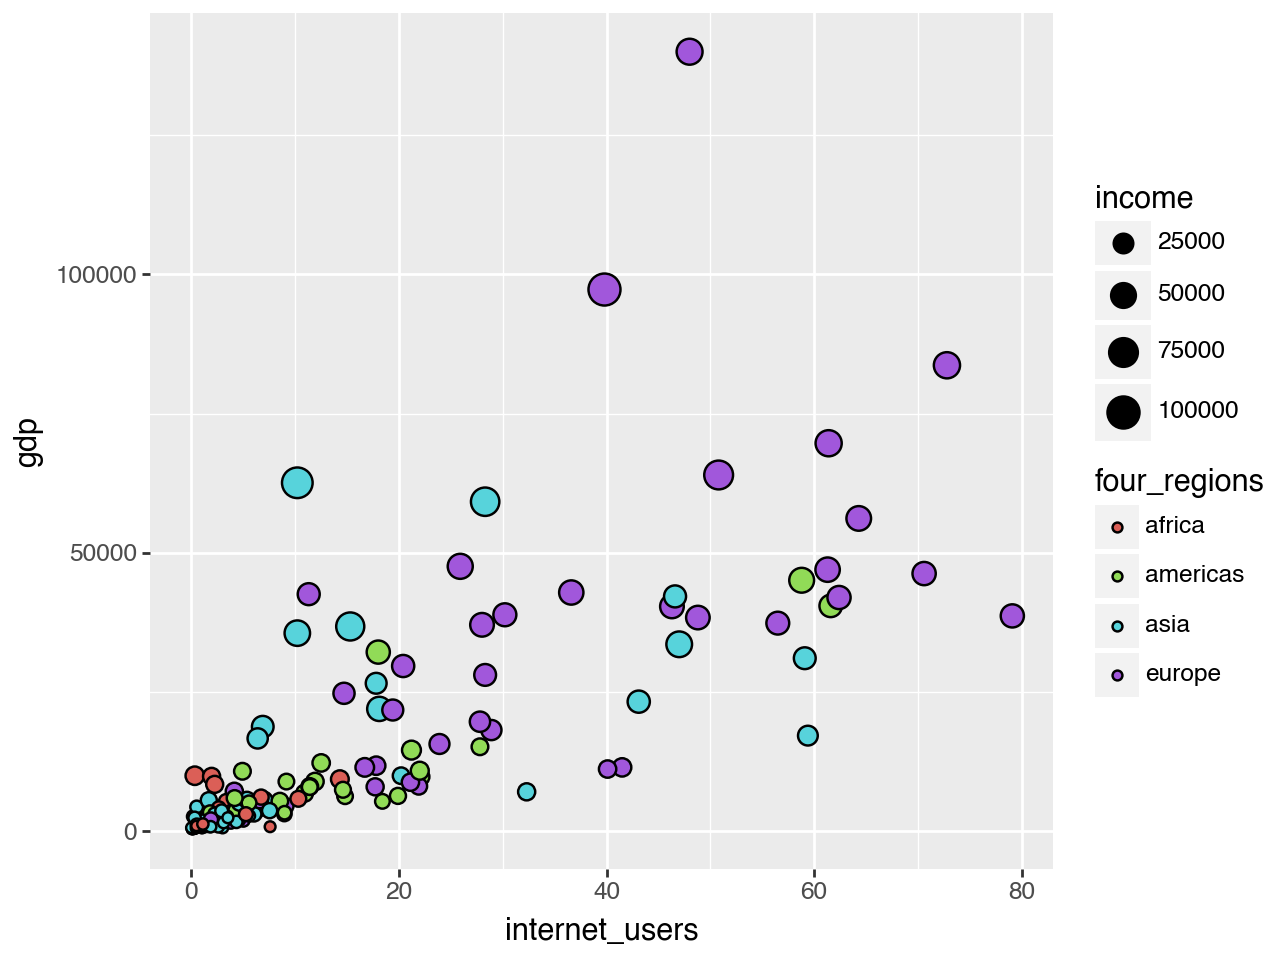

In [191]:
#3

q3= q3.dropna()
(ggplot(q3, 
aes(x = "internet_users",
  y = "gdp",
  size = "income",
  fill= "four_regions"
  ))
+ geom_point(alpha=1))


In [189]:
#3 Attempt2 
q3= q3.dropna()
(ggplot(q3, 
aes(x="internet_users", 
y="gdp", 
size="income", 
fill="4_regions"))
+ geom_point(alpha=0.8) )
 



PlotnineError: "Could not evaluate the 'fill' mapping: '4_regions' (original error: invalid decimal literal (<string-expression>, line 1))"

In [183]:

 + geom_point(alpha=0.8)  
 + scale_fill_manual(values=region_colors)  
 + scale_size(range=(2, 20))  
 + scale_x_continuous(limits=(0, 90), breaks=[10, 20, 30, 40, 50, 60, 70, 80, 90])  # Internet Use %
 + scale_y_log10() 
 + theme_minimal()  
 + labs(title="GDP per Capita vs Internet Use by Region",
        x="Individuals Using the Internet (%)",
        y="GDP/capita")
+guides(size=False)
+scale_x_continuous(breaks=[10,20,30,40,50,60,70,80, 90], limits = (-20,220)
)
+scale_y_continuous(breaks=[50,100,150,200,250,300,350,400], limits = (-20,400))
+scale_size(range=(1,20))
 + theme(figure_size=(12, 6),
         axis_text=element_text(size=10),
         panel_grid_major=element_line(size=0.1),
         panel_background=element_blank())
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'x' is already present.
Adding another scale for 'x',
which will replace the existing scale.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'y' is already present.
Adding another scale for 'y',
which will replace the existing scale.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotnine/scales/scales.py:48: PlotnineWarning: Scale for 'size' is already present.
Adding another scale for 'size',
which will replace the existing scale.



PlotnineError: "Could not evaluate the 'fill' mapping: '4_regions' (original error: invalid decimal literal (<string-expression>, line 1))"